In [32]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from matplotlib.patches import Circle
from plotly import graph_objs as go
import plotly.express as px
from scipy.spatial import ConvexHull
import copy
from scipy.optimize import fmin
import pandas as pd

In [33]:
filename_xy = 'xy.txt'
filename_rgb = 'rgb.txt'
filename_host = 'host.txt'

In [34]:
with open(filename_xy) as file:
    lines_xy = file.readlines()

In [35]:
with open(filename_rgb) as file:
    lines_rgb = file.readlines()

In [36]:
with open(filename_host) as file:
    lines_host = file.readlines()

In [37]:
X = []
Y = []
R = []
G = []
B = []
R_h = []
G_h = []
B_h = []
array = [[int(x) for x in line.split()] for line in lines_xy]
rgb = [[int(x) for x in line.split()] for line in lines_rgb]
host = [[int(x) for x in line.split()] for line in lines_host]

In [38]:
matrix = np.array([[1,-0.292877,-0.70709],[-0.292877,1,-0.70709],[0.70709,0.70709,0.707123]])
matrix_ = np.array([[1,-0.292877,0.70709],[-0.292877,1,0.70709],[-0.70709,-0.70709,0.707123]])
transforms = np.array([[0.926744,0.0664844,0],[0.0183176,0.898206,0],[0,0,1]])

In [39]:
inverse = np.linalg.inv(matrix)

In [40]:
inverse

array([[ 0.62244591, -0.15102287,  0.47140104],
       [-0.15102287,  0.62244591,  0.47140104],
       [-0.47140104, -0.47140104,  0.47142304]])

In [41]:
R = []
G = []
B = []
R_h = []
G_h = []
B_h = []
for i in range(len(array)):
    R.append(float(rgb[i][0]/255))
    G.append(float(rgb[i][1]/255))
    B.append(float(rgb[i][2]/255))
    R_h.append(float(host[i][0]/255))
    G_h.append(float(host[i][1]/255))
    B_h.append(float(host[i][2]/255))
R = np.array(R)
G = np.array(G)
B = np.array(B)
R_h = np.array(R_h)
G_h = np.array(G_h)
B_h = np.array(B_h)
fig1 = go.Figure(data=[go.Scatter3d(
    x=R,
    y=G,
    z=B,
    mode='markers',
    marker=dict(
        size= 2,
        color='red',                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity= 1
    )
),go.Surface(
    x = [1,0,0],
    y = [0,1,0],
    z = [[0,0,1], [0,0,0],[0,1,0]]
    ,opacity= 0.5),go.Scatter3d(
    x=R_h,
    y=G_h,
    z=B_h,
    mode='markers',
    marker=dict(
        size= 2,
        color='blue',                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=1
    )), go.Scatter3d(
    x=R_h,
    y=G_h,
    z=B_h,
    mode='markers',
    marker=dict(
        size= 2,
        color='blue',                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=1
    )
),go.Mesh3d(x=R, 
                        y=G, 
                        z=B, 
                        color="blue", 
                        opacity=.5,
                        alphahull=0),
                       go.Mesh3d(x=R_h, 
                        y=G_h, 
                        z=B_h, 
                        color="green", 
                        opacity=.5,
                        alphahull=0)])
fig = go.Figure(data = fig1.data)
fig['data'][0]['name'] = 'Src'
fig['data'][1]['name'] = 'Destination'
fig.update_scenes(
                      xaxis = dict( title_text='R'),
                      yaxis = dict( title_text='G'),
                      zaxis = dict( title_text='B'),
                )
fig.show()

In [42]:
R = []
G = []
B = []
R_h = []
G_h = []
B_h = []
rgb = np.array(rgb)
host = np.array(host)
for i in range(len(host)):
    rgb[i] = matrix.dot(rgb[i])
    host[i] = matrix.dot(host[i])
for i in range(len(array)):
    X.append(float(array[i][0]/255))
    Y.append(float(array[i][1]/255))
    R.append(float(rgb[i][0]/255))
    G.append(float(rgb[i][1]/255))
    B.append(float(rgb[i][2]/255))
    R_h.append(float(host[i][0]/255))
    G_h.append(float(host[i][1]/255))
    B_h.append(float(host[i][2]/255))
R = np.array(R)
G = np.array(G)
B = np.array(B)
R_h = np.array(R_h)
G_h = np.array(G_h)
B_h = np.array(B_h)

In [43]:
from plotly import graph_objs as go
import numpy as np

fig1 = go.Figure(data=[go.Scatter3d(
    x=R,
    y=G,
    z=B,
    mode='markers',
    marker=dict(
        size= 2,
        color='red',                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity= 1
    )
),go.Surface(
    x = [1,0,0],
    y = [0,1,0],
    z = [[0,0,1], [0,0,0],[0,1,0]]
    ,opacity= 0.5),go.Scatter3d(
    x=R_h,
    y=G_h,
    z=B_h,
    mode='markers',
    marker=dict(
        size= 2,
        color='blue',                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=1
    )), go.Scatter3d(
    x=R_h,
    y=G_h,
    z=B_h,
    mode='markers',
    marker=dict(
        size= 2,
        color='blue',                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=1
    )
),go.Mesh3d(x=R, 
                        y=G, 
                        z=B, 
                        color="blue", 
                        opacity=.5,
                        alphahull=0),
                       go.Mesh3d(x=R_h, 
                        y=G_h, 
                        z=B_h, 
                        color="green", 
                        opacity=.5,
                        alphahull=0)])
fig = go.Figure(data = fig1.data)
fig['data'][0]['name'] = 'Src'
fig['data'][1]['name'] = 'Destination'
fig.update_scenes(
                      xaxis = dict( title_text='R'),
                      yaxis = dict( title_text='G'),
                      zaxis = dict( title_text='B'),
                )
fig.show()

In [13]:
R = []
G = []
B = []
R_h = []
G_h = []
B_h = []
for i in range(len(host)):
    rgb[i] = transforms.dot(rgb[i]) + np.array([0,3.63798e-12, 0])
    host[i] = transforms.dot(host[i]) + np.array([0,3.63798e-12, 0])
for i in range(len(array)):
    R.append(float(rgb[i][0]/255))
    G.append(float(rgb[i][1]/255))
    B.append(float(rgb[i][2]/255))
    R_h.append(float(host[i][0]/255))
    G_h.append(float(host[i][1]/255))
    B_h.append(float(host[i][2]/255))
R = np.array(R)
G = np.array(G)
B = np.array(B)
R_h = np.array(R_h)
G_h = np.array(G_h)
B_h = np.array(B_h)
fig1 = go.Figure(data=[go.Scatter3d(
    x=R,
    y=G,
    z=B,
    mode='markers',
    marker=dict(
        size= 2,
        color='red',                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity= 1
    )
),go.Surface(
    x = [1,0,0],
    y = [0,1,0],
    z = [[0,0,1], [0,0,0],[0,1,0]]
    ,opacity= 0.5),go.Scatter3d(
    x=R_h,
    y=G_h,
    z=B_h,
    mode='markers',
    marker=dict(
        size= 2,
        color='blue',                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=1
    )), go.Scatter3d(
    x=R_h,
    y=G_h,
    z=B_h,
    mode='markers',
    marker=dict(
        size= 2,
        color='blue',                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=1
    )
),go.Mesh3d(x=R, 
                        y=G, 
                        z=B, 
                        color="blue", 
                        opacity=.5,
                        alphahull=0),
                       go.Mesh3d(x=R_h, 
                        y=G_h, 
                        z=B_h, 
                        color="green", 
                        opacity=.5,
                        alphahull=0)])
fig = go.Figure(data = fig1.data)
fig['data'][0]['name'] = 'Src'
fig['data'][1]['name'] = 'Destination'
fig.update_scenes(
                      xaxis = dict( title_text='R'),
                      yaxis = dict( title_text='G'),
                      zaxis = dict( title_text='B'),
                )
fig.show()

In [44]:
R = []
G = []
B = []
R_h = []
G_h = []
B_h = []
for i in range(len(host)):
    rgb[i] = inverse.dot(rgb[i])
    host[i] = inverse.dot(host[i])
for i in range(len(array)):
    R.append(float(rgb[i][0]/255))
    G.append(float(rgb[i][1]/255))
    B.append(float(rgb[i][2]/255))
    R_h.append(float(host[i][0]/255))
    G_h.append(float(host[i][1]/255))
    B_h.append(float(host[i][2]/255))
R = np.array(R)
G = np.array(G)
B = np.array(B)
R_h = np.array(R_h)
G_h = np.array(G_h)
B_h = np.array(B_h)
fig1 = go.Figure(data=[go.Scatter3d(
    x=R,
    y=G,
    z=B,
    mode='markers',
    marker=dict(
        size= 2,
        color='red',                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity= 1
    )
),go.Surface(
    x = [1,0,0],
    y = [0,1,0],
    z = [[0,0,1], [0,0,0],[0,1,0]]
    ,opacity= 0.5),go.Scatter3d(
    x=R_h,
    y=G_h,
    z=B_h,
    mode='markers',
    marker=dict(
        size= 2,
        color='blue',                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=1
    )), go.Scatter3d(
    x=R_h,
    y=G_h,
    z=B_h,
    mode='markers',
    marker=dict(
        size= 2,
        color='blue',                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=1
    )
),go.Mesh3d(x=R, 
                        y=G, 
                        z=B, 
                        color="blue", 
                        opacity=.5,
                        alphahull=0),
                       go.Mesh3d(x=R_h, 
                        y=G_h, 
                        z=B_h, 
                        color="green", 
                        opacity=.5,
                        alphahull=0)])
fig = go.Figure(data = fig1.data)
fig['data'][0]['name'] = 'Src'
fig['data'][1]['name'] = 'Destination'
fig.update_scenes(
                      xaxis = dict( title_text='R'),
                      yaxis = dict( title_text='G'),
                      zaxis = dict( title_text='B'),
                )
fig.show()

# RG channel

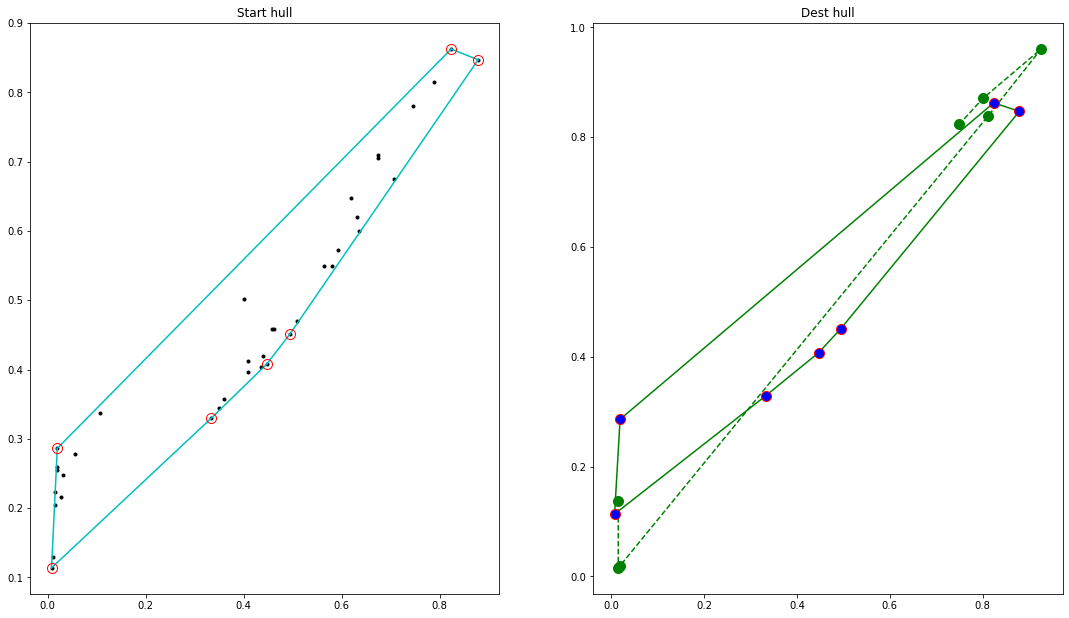

In [15]:
points = []
points_ = []
for i in range(len(R)):
    points.append(np.array([R[i],G[i]]))
    points_.append(np.array([R_h[i], G_h[i]]))
points = np.array(points)
points_ =np.array(points_)
hull = ConvexHull(points)
hull_ = ConvexHull(points_)
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 3))
fig.set_size_inches(18.5, 10.5)
for ax in (ax1, ax2):
    if ax == ax1:
        ax.plot(points[:, 0], points[:, 1], '.', color='k')
        ax.set_title('Start hull')
        for simplex in hull.simplices:
            ax.plot(points[simplex, 0], points[simplex, 1], 'c')
        ax.plot(points[hull.vertices, 0], points[hull.vertices, 1], 'o', mec='r', color='none', lw=1, markersize=10)
    else:
        ax.set_title('Dest hull')
        for simplex in hull.simplices:
            ax.plot(points[simplex, 0], points[simplex, 1], 'g')
        ax.plot(points_[hull_.vertices, 0], points_[hull_.vertices, 1], 'o', color='g', linestyle ='--', markersize=10)
        ax.plot(points[hull.vertices, 0], points[hull.vertices, 1], 'o', mec='r', color='b', lw=1, markersize=10)
plt.show()

In [16]:
points[hull.vertices,0]

array([0.87843137, 0.82352941, 0.01960784, 0.00784314, 0.33333333,
       0.44705882, 0.49411765])

In [17]:
points[hull.vertices,1]

array([0.84705882, 0.8627451 , 0.28627451, 0.11372549, 0.32941176,
       0.40784314, 0.45098039])

In [18]:
points_[hull_.vertices,0]

array([0.01568627, 0.01568627, 0.01960784, 0.81176471, 0.9254902 ,
       0.8       , 0.74901961])

In [15]:
points_[hull_.vertices,1]

array([ 38,   5,   5, 215, 247, 224])

/tmp/ipykernel_2782/3643937215.py:11: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



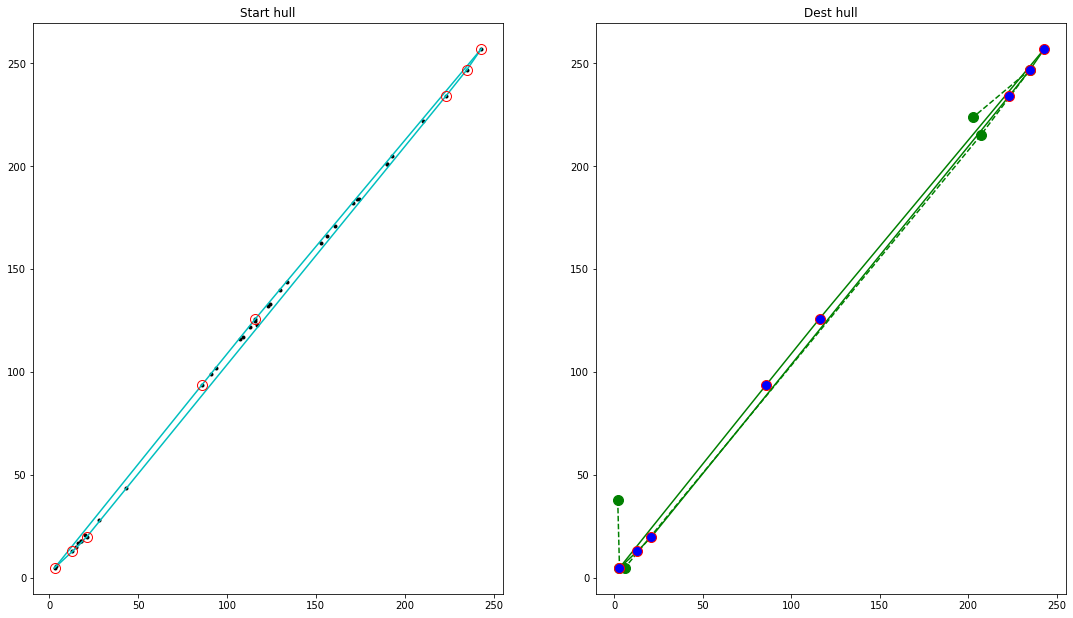

In [16]:
srcTri = np.array([[0,32], [128, 112], [210,221]]).astype(np.float32)
dstTri = np.array([[3,5],[130, 140], [235, 247]]).astype(np.float32)
warp_mat = cv2.getAffineTransform(srcTri, dstTri)
result = []
for i in range(len(points)):
    result.append(np.array([points[i][0],points[i][1],1]).astype(np.float32))
result = np.array(result)
warp_dst = []
for i in range(len(points)):
    warp_dst.append(np.dot(warp_mat, result[i]))
warp_dst = np.array(warp_dst).astype(np.int)
for i in range(len(array)):
    X.append(array[i][0])
    Y.append(array[i][1])
    R.append(warp_dst[i][0])
    G.append(warp_dst[i][1])
    B.append(rgb[i][2])
    R_h.append(host[i][0])
    G_h.append(host[i][1])
    B_h.append(host[i][2])
hull = ConvexHull(warp_dst)
hull_ = ConvexHull(points_)
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 3))
fig.set_size_inches(18.5, 10.5)
points = warp_dst
for ax in (ax1, ax2):
    if ax == ax1:
        ax.plot(points[:, 0], points[:, 1], '.', color='k')
        ax.set_title('Start hull')
        for simplex in hull.simplices:
            ax.plot(points[simplex, 0], points[simplex, 1], 'c')
        ax.plot(points[hull.vertices, 0], points[hull.vertices, 1], 'o', mec='r', color='none', lw=1, markersize=10)
    else:
        ax.set_title('Dest hull')
    
        for simplex in hull.simplices:
            ax.plot(points[simplex, 0], points[simplex, 1], 'g')
        ax.plot(points_[hull_.vertices, 0], points_[hull_.vertices, 1], 'o', color='g', linestyle ='--', markersize=10)
        ax.plot(points[hull.vertices, 0], points[hull.vertices, 1], 'o', mec='r', color='b', lw=1, markersize=10)
plt.show()

In [17]:
from plotly import graph_objs as go
import numpy as np

fig1 = go.Figure(data=[go.Scatter3d(
    x=R,
    y=G,
    z=B,
    mode='markers',
    marker=dict(
        size= 2,
        color='red',                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity= 1
    )
),go.Scatter3d(
    x=R_h,
    y=G_h,
    z=B_h,
    mode='markers',
    marker=dict(
        size= 2,
        color='blue',                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=1
    )
),go.Mesh3d(x=R, 
                        y=G, 
                        z=B, 
                        color="blue", 
                        opacity=.5,
                        alphahull=0),go.Mesh3d(x=R_h, 
                        y=G_h, 
                        z=B_h, 
                        color="green", 
                        opacity=.5,
                        alphahull=0)])
fig = go.Figure(data = fig1.data)
fig['data'][0]['name'] = 'Src'
fig['data'][1]['name'] = 'Destination'
fig.update_scenes(
                      xaxis = dict( title_text='R'),
                      yaxis = dict( title_text='G'),
                      zaxis = dict( title_text='B'),
                )
fig.show()

# RB channel

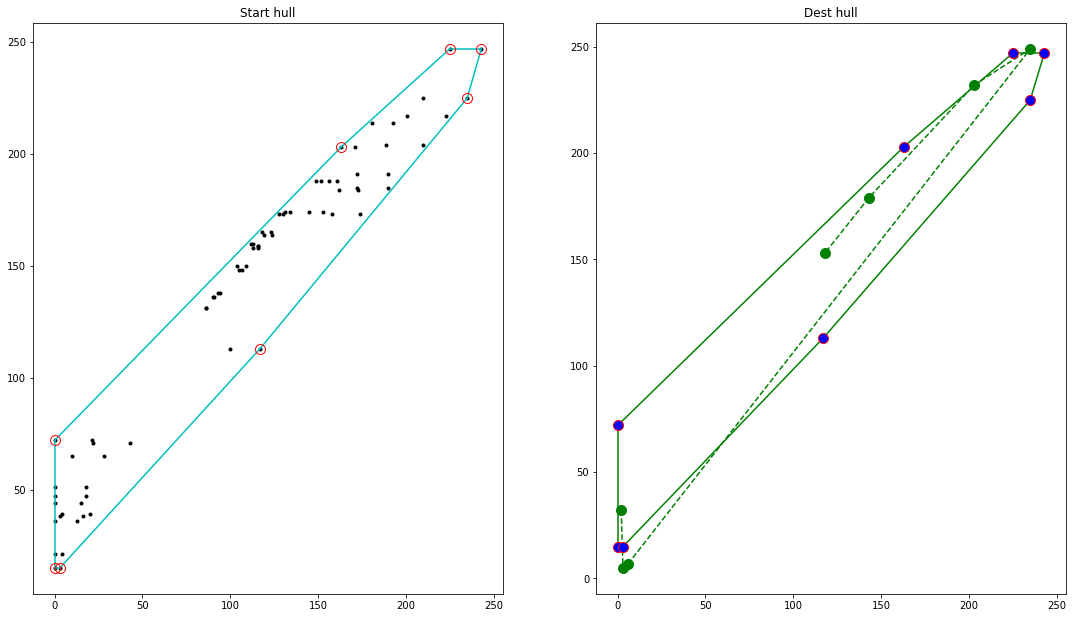

In [18]:
points = []
points_ = []
for i in range(len(R)):
    points.append(np.array([R[i],B[i]]))
    points_.append(np.array([R_h[i], B_h[i]]))
points = np.array(points)
points_ =np.array(points_)
hull = ConvexHull(points)
hull_ = ConvexHull(points_)
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 3))
fig.set_size_inches(18.5, 10.5)
for ax in (ax1, ax2):
    if ax == ax1:
        ax.plot(points[:, 0], points[:, 1], '.', color='k')
        ax.set_title('Start hull')
        for simplex in hull.simplices:
            ax.plot(points[simplex, 0], points[simplex, 1], 'c')
        ax.plot(points[hull.vertices, 0], points[hull.vertices, 1], 'o', mec='r', color='none', lw=1, markersize=10)
    else:
        ax.set_title('Dest hull')
    
        for simplex in hull.simplices:
            ax.plot(points[simplex, 0], points[simplex, 1], 'g')
        ax.plot(points_[hull_.vertices, 0], points_[hull_.vertices, 1], 'o', color='g', linestyle ='--', markersize=10)
        ax.plot(points[hull.vertices, 0], points[hull.vertices, 1], 'o', mec='r', color='b', lw=1, markersize=10)
plt.show()

In [19]:
points[hull.vertices, 0]

array([  0,   0,   3, 117, 235, 243, 225, 163])

In [20]:
points[hull.vertices, 1]

array([ 72,  15,  15, 113, 225, 247, 247, 203])

In [21]:
points_[hull_.vertices, 0]

array([  2,   3,   6, 235, 203, 143, 118])

In [22]:
points_[hull_.vertices, 1]

array([ 32,   5,   7, 249, 232, 179, 153])

/tmp/ipykernel_2782/3246654556.py:11: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



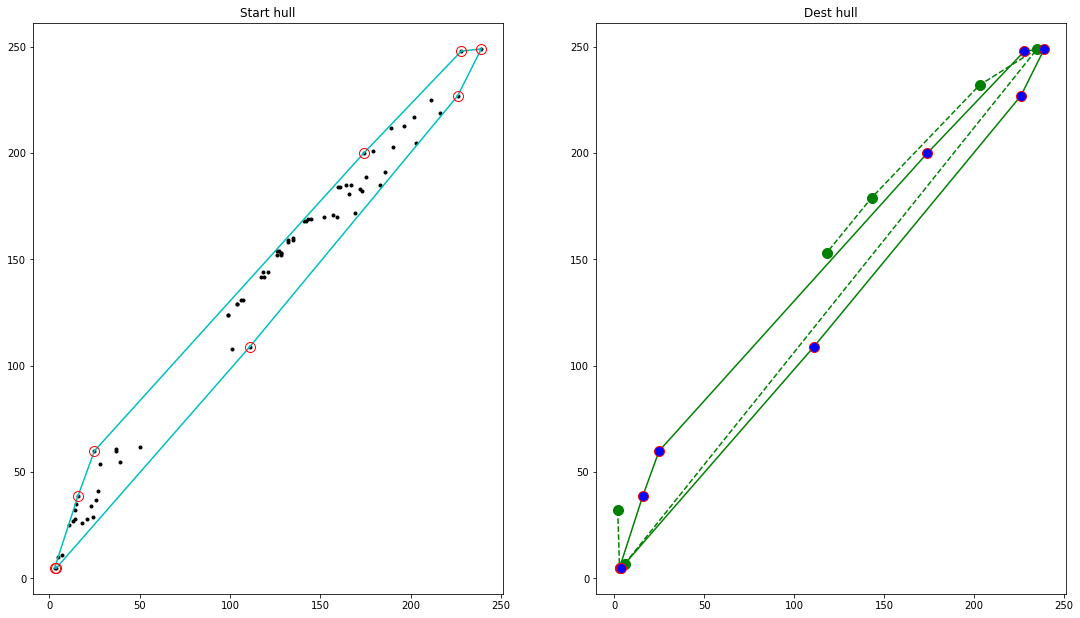

In [23]:
srcTri = np.array([[0,72], [0, 15], [235,247]]).astype(np.float32)
dstTri = np.array([[25,60],[3, 5], [235, 249]]).astype(np.float32)
warp_mat = cv2.getAffineTransform(srcTri, dstTri)
result = []
for i in range(len(points)):
    result.append(np.array([points[i][0],points[i][1],1]).astype(np.float32))
result = np.array(result)
warp_dst = []
for i in range(len(points)):
    warp_dst.append(np.dot(warp_mat, result[i]))
warp_dst = np.array(warp_dst).astype(np.int)
for i in range(len(array)):
    X.append(array[i][0])
    Y.append(array[i][1])
    R.append(warp_dst[i][0])
    G.append(warp_dst[i][1])
    B.append(rgb[i][2])
    R_h.append(host[i][0])
    G_h.append(host[i][1])
    B_h.append(host[i][2])
hull = ConvexHull(warp_dst)
hull_ = ConvexHull(points_)
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 3))
fig.set_size_inches(18.5, 10.5)
points = warp_dst
for ax in (ax1, ax2):
    if ax == ax1:
        ax.plot(points[:, 0], points[:, 1], '.', color='k')
        ax.set_title('Start hull')
        for simplex in hull.simplices:
            ax.plot(points[simplex, 0], points[simplex, 1], 'c')
        ax.plot(points[hull.vertices, 0], points[hull.vertices, 1], 'o', mec='r', color='none', lw=1, markersize=10)
    else:
        ax.set_title('Dest hull')
    
        for simplex in hull.simplices:
            ax.plot(points[simplex, 0], points[simplex, 1], 'g')
        ax.plot(points_[hull_.vertices, 0], points_[hull_.vertices, 1], 'o', color='g', linestyle ='--', markersize=10)
        ax.plot(points[hull.vertices, 0], points[hull.vertices, 1], 'o', mec='r', color='b', lw=1, markersize=10)
plt.show()

In [24]:
from plotly import graph_objs as go
import numpy as np

fig1 = go.Figure(data=[go.Scatter3d(
    x=R,
    y=G,
    z=B,
    mode='markers',
    marker=dict(
        size= 2,
        color='red',                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity= 1
    )
),go.Scatter3d(
    x=R_h,
    y=G_h,
    z=B_h,
    mode='markers',
    marker=dict(
        size= 2,
        color='blue',                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=1
    )
),go.Mesh3d(x=R, 
                        y=G, 
                        z=B, 
                        color="blue", 
                        opacity=.5,
                        alphahull=0),go.Mesh3d(x=R_h, 
                        y=G_h, 
                        z=B_h, 
                        color="green", 
                        opacity=.5,
                        alphahull=0)])
fig = go.Figure(data = fig1.data)
fig['data'][0]['name'] = 'Src'
fig['data'][1]['name'] = 'Destination'
fig.update_scenes(
                      xaxis = dict( title_text='R'),
                      yaxis = dict( title_text='G'),
                      zaxis = dict( title_text='B'),
                )
fig.show()

# GB channel

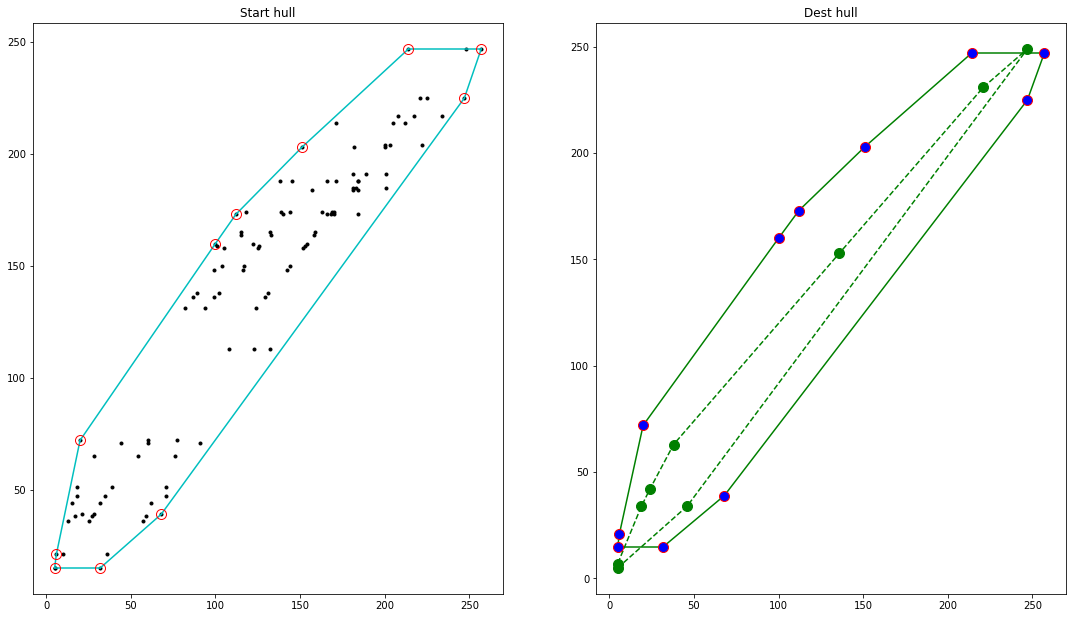

In [25]:
points = []
points_ = []
for i in range(len(R)):
    points.append(np.array([G[i],B[i]]))
    points_.append(np.array([G_h[i], B_h[i]]))
points = np.array(points)
points_ =np.array(points_)
hull = ConvexHull(points)
hull_ = ConvexHull(points_)
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 3))
fig.set_size_inches(18.5, 10.5)
for ax in (ax1, ax2):
    if ax == ax1:
        ax.plot(points[:, 0], points[:, 1], '.', color='k')
        ax.set_title('Start hull')
        for simplex in hull.simplices:
            ax.plot(points[simplex, 0], points[simplex, 1], 'c')
        ax.plot(points[hull.vertices, 0], points[hull.vertices, 1], 'o', mec='r', color='none', lw=1, markersize=10)
    else:
        ax.set_title('Dest hull')
    
        for simplex in hull.simplices:
            ax.plot(points[simplex, 0], points[simplex, 1], 'g')
        ax.plot(points_[hull_.vertices, 0], points_[hull_.vertices, 1], 'o', color='g', linestyle ='--', markersize=10)
        ax.plot(points[hull.vertices, 0], points[hull.vertices, 1], 'o', mec='r', color='b', lw=1, markersize=10)
plt.show()

In [26]:
points[hull.vertices, 0]

array([257, 214, 151, 112, 100,  20,   6,   5,  32,  68, 247])

In [27]:
points[hull.vertices, 1]

array([247, 247, 203, 173, 160,  72,  21,  15,  15,  39, 225])

In [28]:
points_[hull_.vertices, 0]

array([  5,  46, 247, 221, 136,  38,  24,  19,   5])

In [29]:
points_[hull_.vertices, 1]

array([  5,  34, 249, 231, 153,  63,  42,  34,   7])

/tmp/ipykernel_2782/181721091.py:11: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



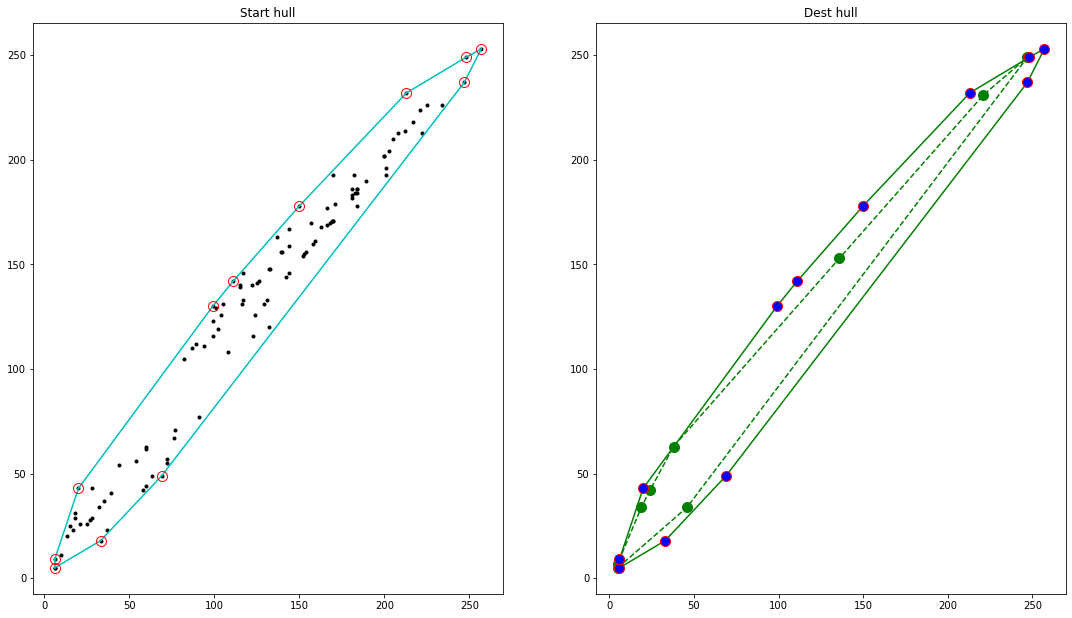

In [30]:
srcTri = np.array([[4,15], [100, 160], [247,247]]).astype(np.float32)
dstTri = np.array([[5,5],[100, 130], [247, 249]]).astype(np.float32)
warp_mat = cv2.getAffineTransform(srcTri, dstTri)
result = []
for i in range(len(points)):
    result.append(np.array([points[i][0],points[i][1],1]).astype(np.float32))
result = np.array(result)
warp_dst = []
for i in range(len(points)):
    warp_dst.append(np.dot(warp_mat, result[i]))
warp_dst = np.array(warp_dst).astype(np.int)
for i in range(len(array)):
    X.append(array[i][0])
    Y.append(array[i][1])
    R.append(warp_dst[i][0])
    G.append(warp_dst[i][1])
    B.append(rgb[i][2])
    R_h.append(host[i][0])
    G_h.append(host[i][1])
    B_h.append(host[i][2])
hull = ConvexHull(warp_dst)
hull_ = ConvexHull(points_)
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 3))
fig.set_size_inches(18.5, 10.5)
points = warp_dst
for ax in (ax1, ax2):
    if ax == ax1:
        ax.plot(points[:, 0], points[:, 1], '.', color='k')
        ax.set_title('Start hull')
        for simplex in hull.simplices:
            ax.plot(points[simplex, 0], points[simplex, 1], 'c')
        ax.plot(points[hull.vertices, 0], points[hull.vertices, 1], 'o', mec='r', color='none', lw=1, markersize=10)
    else:
        ax.set_title('Dest hull')
    
        for simplex in hull.simplices:
            ax.plot(points[simplex, 0], points[simplex, 1], 'g')
        ax.plot(points_[hull_.vertices, 0], points_[hull_.vertices, 1], 'o', color='g', linestyle ='--', markersize=10)
        ax.plot(points[hull.vertices, 0], points[hull.vertices, 1], 'o', mec='r', color='b', lw=1, markersize=10)
plt.show()

In [31]:
from plotly import graph_objs as go
import numpy as np

fig1 = go.Figure(data=[go.Scatter3d(
    x=R,
    y=G,
    z=B,
    mode='markers',
    marker=dict(
        size= 2,
        color='red',                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity= 1
    )
),go.Scatter3d(
    x=R_h,
    y=G_h,
    z=B_h,
    mode='markers',
    marker=dict(
        size= 2,
        color='blue',                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=1
    )
),go.Mesh3d(x=R, 
                        y=G, 
                        z=B, 
                        color="blue", 
                        opacity=.5,
                        alphahull=0),go.Mesh3d(x=R_h, 
                        y=G_h, 
                        z=B_h, 
                        color="green", 
                        opacity=.5,
                        alphahull=0)])
fig = go.Figure(data = fig1.data)
fig['data'][0]['name'] = 'Src'
fig['data'][1]['name'] = 'Destination'
fig.update_scenes(
                      xaxis = dict( title_text='R'),
                      yaxis = dict( title_text='G'),
                      zaxis = dict( title_text='B'),
                )
fig.show()

In [32]:
def tetrahedron_volume(a, b, c, d):
    return np.abs(np.einsum('ij,ij->i', a-d, np.cross(b-d, c-d))) / 6

from scipy.spatial import Delaunay

pts = np.random.rand(10, 3)
dt = Delaunay(pts)
tets = dt.points[dt.simplices]
vol = np.sum(tetrahedron_volume(tets[:, 0], tets[:, 1], 
                                tets[:, 2], tets[:, 3]))

In [33]:
filename  = 'vertices.txt'
with open(filename) as file:
    lines = file.readlines()

In [34]:
thirds = []
for line in lines:
    thirds.append([float(x) for x in line.split()])
thirds = np.array(thirds).astype(np.float32)

In [35]:
df = pd.DataFrame(dict(
    x = thirds[:, 0],
    y = thirds[:, 1],
    z = thirds[:, 2]
))
fig = px.line(df, x="x", y="y", title="Unsorted Input") 
fig.show()

In [36]:
fig = px.line_3d(df, x = 'x', y = 'y', z = 'z')
fig.add_trace(go.Scatter3d(x = R_h, y = G_h, z = B_h, mode='markers' , marker=dict(
        size= 5,
        color='red',                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity= 1
    )))
fig.show()

In [37]:
import cvxpy as cp
import numpy as np

# Generate data.
m = 20
n = 15
np.random.seed(1)
A = np.random.randn(m, n)
b = np.random.randn(m)

# Define and solve the CVXPY problem.
x = cp.Variable(n)
cost = cp.sum_squares(A @ x - b)
prob = cp.Problem(cp.Minimize(cost))
prob.solve()

# Print result.
print("\nThe optimal value is", prob.value)
print("The optimal x is")
print(x.value)
print("The norm of the residual is ", cp.norm(A @ x - b, p=2).value)


The optimal value is 7.005909828287485
The optimal x is
[ 0.17492418 -0.38102551  0.34732251  0.0173098  -0.0845784  -0.08134019
  0.293119    0.27019762  0.17493179 -0.23953449  0.64097935 -0.41633637
  0.12799688  0.1063942  -0.32158411]
The norm of the residual is  2.646867928002356


In [38]:
!pip install cvxpy

In [39]:
len(R)

148

In [54]:
points_src= []
points_dst = []
for i in range(len(R)):
    points_src.append(np.array([R[i],G[i],B[i]]))
    points_dst.append(np.array([R_h[i],G_h[i], B_h[i]]))

In [127]:
hull_src = ConvexHull(points_src)
hull_dst = ConvexHull(points_dst)

In [128]:
m = min(len(hull_src.vertices), len(hull_dst.vertices))

In [129]:
hull_src.vertices = hull_src.vertices[:14]

AttributeError: can't set attribute

In [130]:
array = hull_src.vertices[:14]

In [131]:
array

array([ 0,  4,  7,  8, 13, 14, 16, 17, 18, 22, 25, 28, 29, 31],
      dtype=int32)

In [55]:
START = np.array(points_src)
END = np.array(points_dst)
#for i in range(m):
#    START.append(np.array([R[hull_src.vertices[i]],G[hull_src.vertices[i]],B[hull_src.vertices[i]]]))
#    END.append(np.array([R_h[hull_dst.vertices[i]],G_h[hull_dst.vertices[i]],B_h[hull_dst.vertices[i]]]))

In [56]:
A = np.random.randn(3*len(START), 9)
b = np.random.randn(3*len(START))

In [57]:
j = 0 
for i in range(0,42,3):
    A[i][0] = START[j][0]
    A[i][1] = START[j][1]
    A[i][2] = START[j][2]
    A[i][3:] = 0
    A[i+1][:3] = 0
    A[i+1][3] = START[j][0]
    A[i+1][4] = START[j][1]
    A[i+1][5] = START[j][2]
    A[i+1][6:] = 0
    A[i+2][:6] = 0
    A[i+2][6] = START[j][0]
    A[i+2][7] = START[j][1]
    A[i+2][8] = START[j][2]
    

In [58]:
j = 0
for i in range(0,42,3):
    b[i] = END[j][0]
    b[i+1]=END[j][1]
    b[i+2]=END[j][2]
    j = j + 1

In [59]:
# Define and solve the CVXPY problem.
x = cp.Variable(9)
cost = cp.sum_squares(A @ x - b)
prob = cp.Problem(cp.Minimize(cost))
prob.solve()

199212.2363590939

In [60]:
Matrix = np.reshape(x.value,(3,3))

In [61]:
points_src= []
points_dst = []
for i in range(len(R)):
    points_src.append(np.array([R[i],G[i],B[i]]))
    points_dst.append(np.array([R_h[i],G_h[i], B_h[i]]))

In [62]:
final = []
for i in range(len(points_src)):
    final.append(np.dot(Matrix, points_src[i]))

In [63]:
a = np.array(final, dtype=np.int)

/tmp/ipykernel_2782/976432873.py:1: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [64]:
R = []
G = [] 
B = []
for i in a:
    R.append(i[0])
    G.append(i[1])
    B.append(i[2])

In [142]:
R

[97,
 101,
 104,
 117,
 121,
 122,
 156,
 171,
 48,
 160,
 130,
 49,
 130,
 230,
 16,
 138,
 135,
 37,
 122,
 115,
 31,
 188,
 168,
 152,
 183,
 19,
 211,
 167,
 39,
 61,
 35,
 221,
 33,
 117,
 200,
 181,
 40]

In [65]:
from plotly import graph_objs as go
import numpy as np

fig1 = go.Figure(data=[go.Scatter3d(
    x=R,
    y=G,
    z=B,
    mode='markers',
    marker=dict(
        size= 2,
        color='red',                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity= 1
    )
),go.Scatter3d(
    x=R_h,
    y=G_h,
    z=B_h,
    mode='markers',
    marker=dict(
        size= 2,
        color='blue',                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=1
    )
),go.Mesh3d(x=R, 
                        y=G, 
                        z=B, 
                        color="blue", 
                        opacity=.5,
                        alphahull=0),go.Mesh3d(x=R_h, 
                        y=G_h, 
                        z=B_h, 
                        color="green", 
                        opacity=.5,
                        alphahull=0)])
fig = go.Figure(data = fig1.data)
fig['data'][0]['name'] = 'Src'
fig['data'][1]['name'] = 'Destination'
fig.update_scenes(
                      xaxis = dict( title_text='R'),
                      yaxis = dict( title_text='G'),
                      zaxis = dict( title_text='B'),
                )
fig.show()

In [66]:
answer = img
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        answer[i][j] = (np.dot(Matrix,img[i][j]))

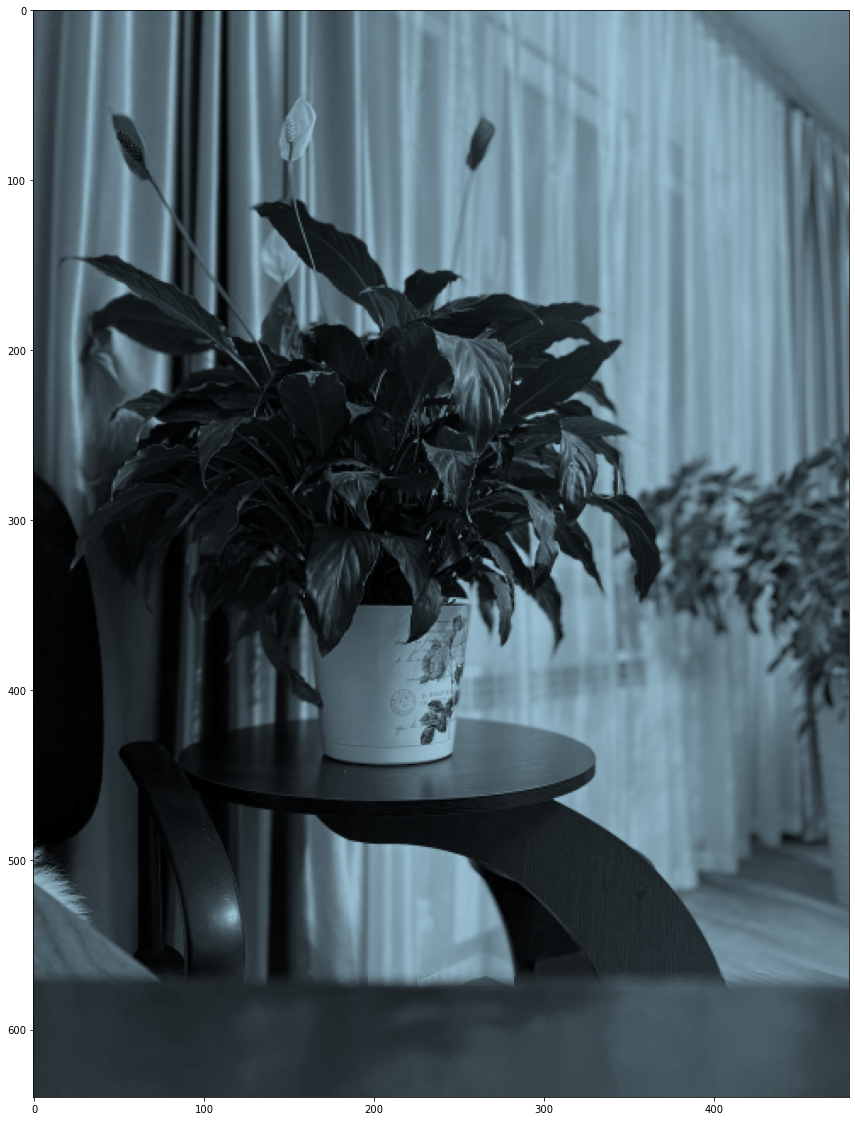

In [67]:
fig = plt.figure()
fig.set_size_inches(20, 20)
ax = plt.gca()
ax.invert_yaxis()
plt.imshow(answer)

In [115]:
answer = np.array(answer, dtype=np.int)

/tmp/ipykernel_16871/2975726428.py:1: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [118]:
answer.reshape(img.shape)

array([[[ 14,  18,  15],
        [ 15,  19,  17],
        [ 18,  22,  20],
        ...,
        [ 93, 105, 110],
        [ 93, 105, 110],
        [ 93, 105, 109]],

       [[ 14,  19,  16],
        [ 15,  19,  17],
        [ 18,  22,  20],
        ...,
        [ 93, 105, 110],
        [ 93, 105, 109],
        [ 92, 104, 108]],

       [[ 15,  19,  17],
        [ 16,  20,  18],
        [ 18,  23,  21],
        ...,
        [ 93, 105, 109],
        [ 92, 104, 108],
        [ 91, 103, 107]],

       ...,

       [[ 22,  24,  24],
        [ 22,  25,  25],
        [ 22,  25,  25],
        ...,
        [ 37,  42,  43],
        [ 38,  43,  43],
        [ 38,  43,  43]],

       [[ 22,  24,  24],
        [ 22,  25,  25],
        [ 22,  25,  25],
        ...,
        [ 37,  42,  43],
        [ 37,  41,  42],
        [ 37,  41,  42]],

       [[ 22,  24,  24],
        [ 22,  25,  25],
        [ 22,  25,  25],
        ...,
        [ 37,  41,  42],
        [ 36,  40,  41],
        [ 35,  40,  40]]

In [120]:
answer.shape

(307200, 3)